 <div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Jay, my name is Dmitrii. I'm going to review your project! Nice to meet you! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall well done! I can see that a lot of effort has been made! Your project looks really amazing and you accomplished impressive results.
    
There is only one critical issue/comment:
- Check other missing data and make decision about these columns. 
    
Also please let me know if you have questions or you want to change smth additionally in the project.
    
Come back soon! :)

</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 

Thank you for leaving your comments/feedback and improving you project!
No critial issues left and everything is perfect now. 

Please keep up the great work and good luck on the next project :)
</div>

# Identifying Successful Online Games 
## Introduction: 
### We have been provided with a recordset of historical online gaming data ranging from 1980 - 2016.  We have metrics such as: platform, revenue breakdowns by region, genre, reviews, and ratings.  We want to use this data to be able to identify potential big winners and share that information with our advertising team.  

In [1]:
#pip install sidetable

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import random
import numpy
import seaborn as sns
import sidetable
from scipy import stats as st

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b>
 
- Great that you added additional information about the project goal and tasks.

</div>

## Step 1. Open the data file and study the general information

In [3]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.describe(include="all")

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### There are 16715 records listed ranging from 1980 - 2016.  *platform*, and all the *_sales* columns have no missing values.  There are only 2 datatypes: object and float.  Let's investigate!

## Step 2. Prepare the data

###     2a) Change column names to lowercase.

In [6]:
df.columns= df.columns.str.lower()
print(list(df.columns))

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


### 2b) Convert the data to the required types.

In [7]:
# This will later be used for categorization purposes.  
# Let's create a second column, 'year' as a string, 
# so we can have the benefits of both datatypes.

df['year'] = df['year_of_release'].astype(str)

### 2c) Describe the columns where the data types have been changed and why.
#### See Comments in Step 2b
#### We added a column called 'user_score_float' which is just 'user_score' converted to float.  The fact that its datatype is an object caused problems in Step 5a, hence the conversion. 

### 2d) If necessary, decide how to deal with missing values:

In [8]:
df.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
It is indeed helpful to check not only the total amount of missing values in each column but also look at the percentage of missing values. It helps to understand the overall impact.


#### Having a user_score of 'tbd' probably means that the game has yet to be rated by users.  Perhaps it is too new; perhaps it's too unpopular.  Let's change the values to np.nan.

#### in step 3b3 we replaced NaN values with zeros for the column 'total_values'
#### In step 5a we filled the NaN values with the median in our new column 'user_score_float'.

user_score
critic_score
rating
year_of_release
name
genre

In [9]:
df.loc[df.user_score == 'tbd', 'user_score'] = 'np.nan'
df['critic_score'] = df['critic_score'].fillna(df['critic_score'].median())
df['rating'] = df['rating'].fillna(df['rating'] =='None')
#df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release'] =='None')
df.year_of_release.dropna()
df = df[df['year_of_release'].notna()]
df = df[df['name'].notna()]
df = df[df['genre'].notna()]

In [10]:
df.year.unique()

array(['2006.0', '1985.0', '2008.0', '2009.0', '1996.0', '1989.0',
       '1984.0', '2005.0', '1999.0', '2007.0', '2010.0', '2013.0',
       '2004.0', '1990.0', '1988.0', '2002.0', '2001.0', '2011.0',
       '1998.0', '2015.0', '2012.0', '2014.0', '1992.0', '1997.0',
       '1993.0', '1994.0', '1982.0', '2016.0', '2003.0', '1986.0',
       '2000.0', '1995.0', '1991.0', '1981.0', '1987.0', '1980.0',
       '1983.0'], dtype=object)

<div class="alert alert-info"> <b>Is there anything more I can do with user_score?</b> </div>    


In [11]:
 df.stb.missing(style=True)

,missing,total,percent
user_score,"6,605","16,444",40.17%
name,0,"16,444",0.00%
platform,0,"16,444",0.00%
year_of_release,0,"16,444",0.00%
genre,0,"16,444",0.00%
na_sales,0,"16,444",0.00%
eu_sales,0,"16,444",0.00%
jp_sales,0,"16,444",0.00%
other_sales,0,"16,444",0.00%
critic_score,0,"16,444",0.00%


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>
    
Great, everything is correct here, but what about other columns with missing values? 

Can you please add information about critic_score, rating, year_of_release, name, genre? 

<div class="alert alert-info"> <b>Thanks. Done!</b></div>    


<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Thanks for adding that.
You did a great job of restoring missing values in rating. 

`name`, `genre`, `year_of_release`
Here we have a very small proportion of missing data (<2%) it can be easier just to delete it.
                                                           
`rating`                                                           
So here the easiest way would be to fill all missing values with some placeholder which could be for example "None".                                                           

<div class="alert alert-warning">
<b>Reviewer's comment v2:</b>
    
    
`Critic_score / User_score`
    
Here we can just replace missing values just with nan, as .mean()/.median() can lead to some incorect interpretation of data (for example if critic score is much lower on a specific platform like Cyberpunk on PS4).



### 2e) Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [12]:
df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,2006.0,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,71.0,NaN,False,1985.0,40.24


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great, everything is correct here. 


<div class="alert alert-info"> <b>Thanks!</b> </div>    


## Step 3. Analyze the data

### 3a) Look at how many games were released in different years. Is the data for every period significant?

In [13]:
df_games_sold_by_year =df[['year_of_release','name']].groupby(['year_of_release']).count().sort_values(by='year_of_release').reset_index()
df_games_sold_by_year.tail(2)

,year_of_release,name
35,2015.0,606
36,2016.0,502


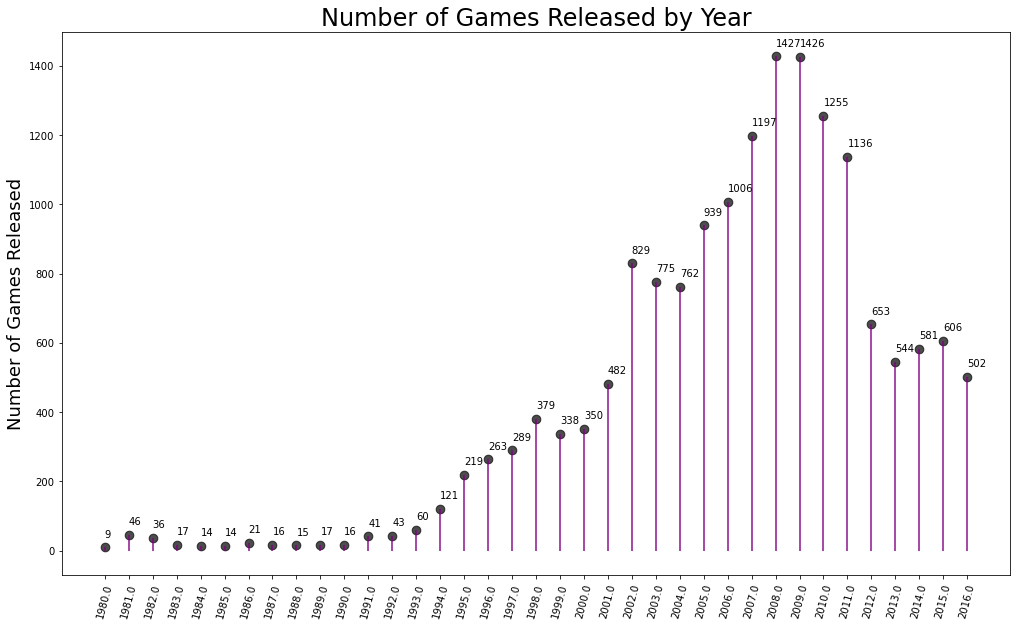

In [14]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=df_games_sold_by_year.year_of_release, ymin=0, ymax=df_games_sold_by_year.name,color='purple',alpha=0.7,linewidth=2)
ax.scatter(x=df_games_sold_by_year.year_of_release,y=df_games_sold_by_year.name,s=75,color='black',alpha=0.7)

ax.set_title('Number of Games Released by Year', fontdict={'size':24})
ax.set_ylabel('Number of Games Released', fontdict={'size':18})
ax.set_xticks(df_games_sold_by_year.year_of_release)
ax.set_xticklabels(df_games_sold_by_year.year_of_release,rotation=75)

for row in df_games_sold_by_year.itertuples():
    ax.text(row.year_of_release,row.name+30, s=round(row.name,2))
plt.show()

#### The data starts becoming significant in the mid-90s. Prior to that it seems to be an nitche industry.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1993.

</div>

<div class="alert alert-info"> <b>I had a 2600 in the 80s</b> </div>    


### 3b1) Look at how sales varied from platform to platform. 

In [15]:
#df_sales_platform = df.stb.freq(['platform'],value='total_sales',style=True,cum_cols=False)
#df_sales_platform
df_platform_sales = df[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales',ascending=False).reset_index()
top_platforms = df_platform_sales['platform'].head(24) # We will use this for a join a few cells down
print('There are',len(df_platform_sales.platform.unique()),'platforms')
df_platform_sales.head(2)

There are 31 platforms


,platform,total_sales
0,PS2,1233.56
1,X360,961.24


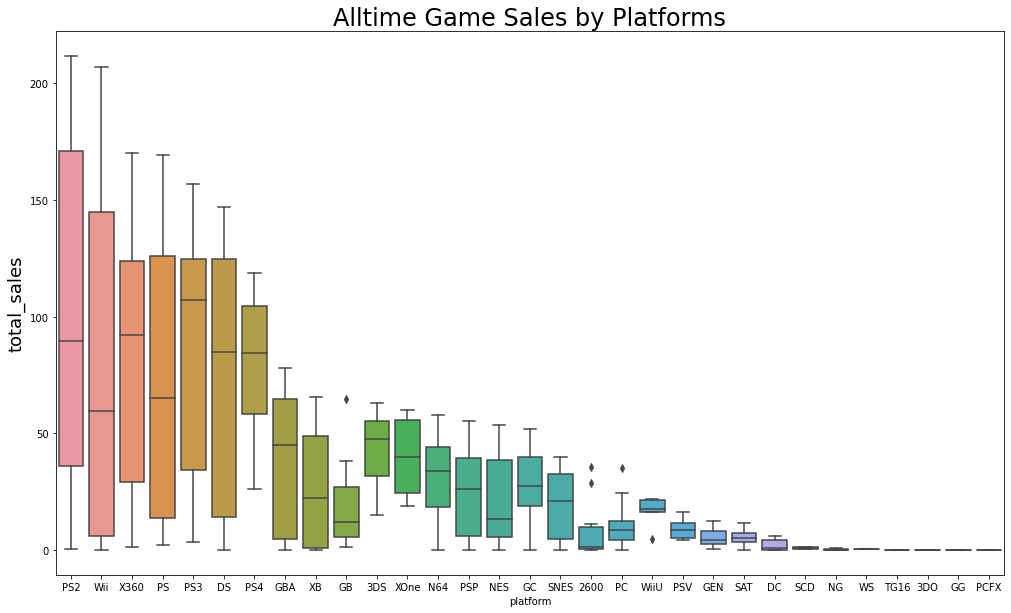

In [16]:
df_platform_sales=df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
df_top_platform_years = df_platform_sales.sort_values(by='total_sales',ascending=False)

#top_platforms = df_platform_sales['platform'].head(3)
#df_top_platform_years = pd.merge(left = top_platforms ,right = df, how='inner',on='platform')

fig,ax=plt.subplots(figsize=(17,10))
ax.set_title('Alltime Game Sales by Platforms', fontdict={'size':24})
ax.set_ylabel('Sales in Millions', fontdict={'size':18})
sns.boxplot(data=df_top_platform_years, x="platform", y="total_sales")
plt.show()



### 3b2) Choose the platforms with the greatest total sales and build a distribution based on data for each year. 

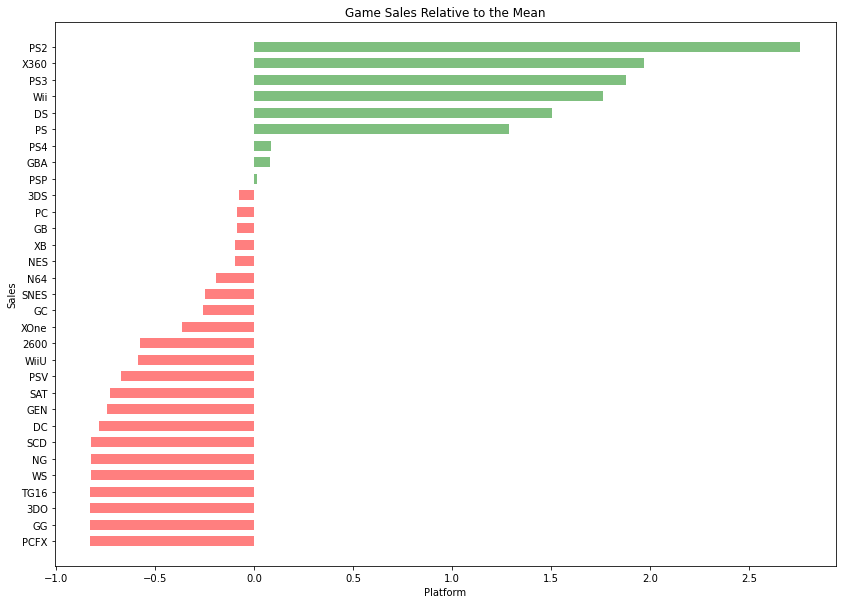

In [17]:
df_relative_to_mean = df[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
df_relative_to_mean['sales_z']=(df_relative_to_mean['total_sales']-df_relative_to_mean['total_sales'].mean())/df_relative_to_mean['total_sales'].std()
df_relative_to_mean['color'] = ['red' if x<0 else 'green' for x in df_relative_to_mean['sales_z']]

plt.figure(figsize=(14,10))
plt.hlines(y=df_relative_to_mean.platform, xmax=df_relative_to_mean.sales_z, xmin=0, color=df_relative_to_mean.color, alpha=0.5,linewidth=10)

plt.xlabel('Platform')
plt.ylabel('Sales')
plt.title("Game Sales Relative to the Mean")
plt.show()

#### Nine platforms show sales above the mean.  

In [18]:
df_top_platform_years = pd.merge(left = top_platforms ,right = df, how='inner',on='platform')
df_top_platform_years.head(2)

,platform,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year,total_sales
0,PS2,Grand Theft Auto: San Andreas,2004.0,Action,9.43,0.40,0.41,10.57,95.0,9,M,2004.0,20.81
1,PS2,Grand Theft Auto: Vice City,2002.0,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,2002.0,16.15


In [19]:
df_top_revenue_by_year=df_top_platform_years[['year_of_release','total_sales','platform']].groupby(['year_of_release','platform']).sum().sort_values(by='year_of_release',ascending=True).reset_index()
df_top_revenue_by_year.tail(2)

,year_of_release,platform,total_sales
222,2016.0,PS4,69.25
223,2016.0,XOne,26.15


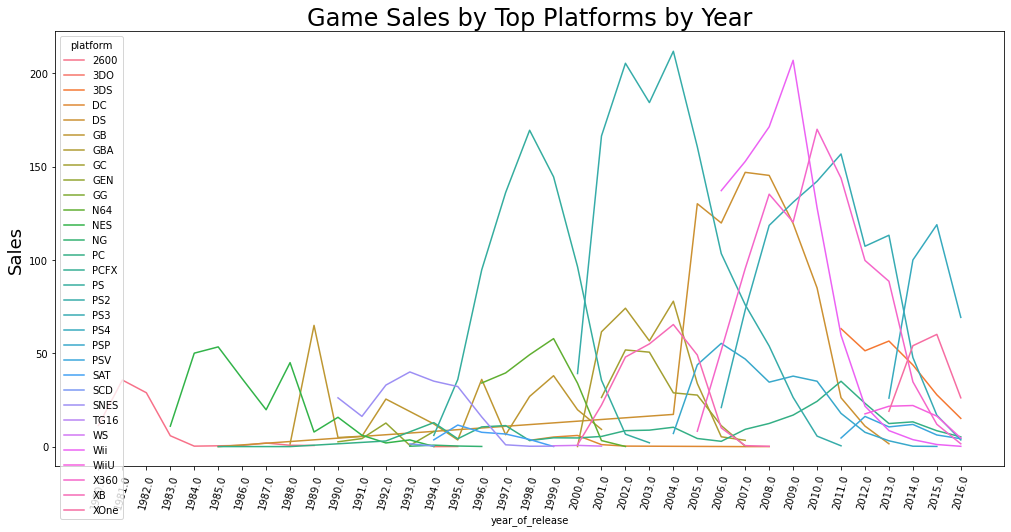

In [20]:
df_top_platform_years=df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

fig,ax=plt.subplots(figsize=(17,8))
ax.set_title('Game Sales by Top Platforms by Year', fontdict={'size':24})
ax.set_ylabel('Sales', fontdict={'size':18})
ax.set_xticks(df_games_sold_by_year.year_of_release)
ax.set_xticklabels(df_games_sold_by_year.year_of_release,rotation=75)
sns.lineplot(data=df_top_platform_years, x="year_of_release", y="total_sales", hue="platform")
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
That is also correct to check platform life cycle but here you could also leave only recent or most popular platforms.
</div>

<div class="alert alert-info"> <b>I plan to do this once I catch-up.  I want to be going over my old projects every morning to make them better. I realize they are my portfolio, and I want to continually improve them until I get a job.</b> </div>    


<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
🙌

### The 2006 data from Wii is skewing the chart.  Let's look at the chart without Wii, and then we'll try to determine the cause of the spike.  Let's look at the top 3 platforms.

In [21]:
df_top_platform_years.head(2)

,platform,year_of_release,total_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68


In [22]:
df_top_platform_years.head(2)

,platform,year_of_release,total_sales
0,2600,1980.0,11.38
1,2600,1981.0,35.68


### It took about 7.7 years for these platforms to run their course (see Step 3b3).   PS2 and PS3 had  crossover sales from 2005 until 2011 when PS2 faded into obsolescence.

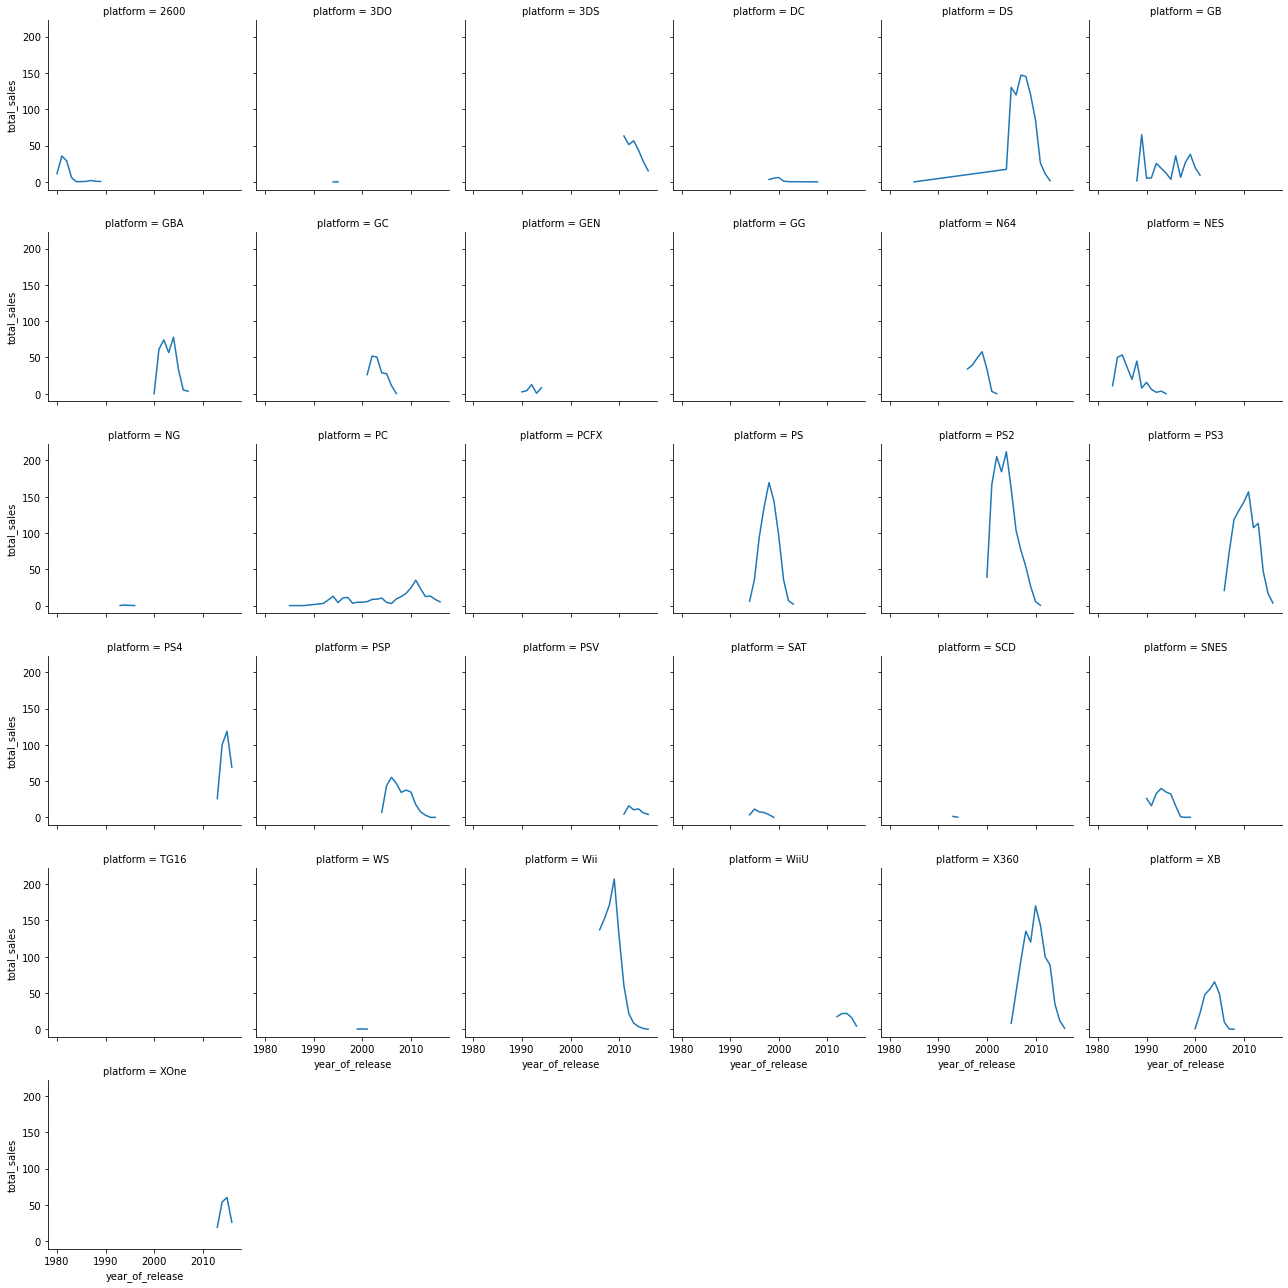

In [23]:
df_chart = df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
grid = sns.FacetGrid(df_chart, col="platform",col_wrap=6)
grid.map(sns.lineplot, "year_of_release", "total_sales")
plt.show()

### 3b3) Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [24]:
df['total_sales'] = df['total_sales'].fillna(0) #see Step 2d for explaination

In [25]:
#maybe delete not quite what I'm looking for - this gives me all platforms, not active ones
df_platforms_active_in_2016 = df.groupby(['platform','year_of_release'])['name'].count().reset_index()
df_platform_years = df_platforms_active_in_2016[['platform','year_of_release']]
df_platform_years_active = df_platform_years.groupby(['platform'])['year_of_release'].count().reset_index()
print('The average life of our all active  and non active platforms is',df_platform_years_active.year_of_release.mean(),'years.')

The average life of our all active  and non active platforms is 7.67741935483871 years.


In [26]:
df_sales_not_in_2016 = df.query('year_of_release != 2016 & total_sales > 0')
print("Latest year_of_release in new dataset", df_sales_not_in_2016.year_of_release.max())
print('Smallest total_sales in new dataset',df_sales_not_in_2016.total_sales.min())
print('Number of records in new dataset',df_sales_not_in_2016.platform.count())

Latest year_of_release in new dataset 2015.0
Smallest total_sales in new dataset 0.01
Number of records in new dataset 15940


In [27]:
df_platforms_not_active_in_2016 = df_sales_not_in_2016.groupby(['platform','year_of_release'])['name'].count().reset_index()
df_platform_years = df_platforms_not_active_in_2016[['platform','year_of_release']]
df_platform_years_not_active = df_platform_years.groupby(['platform'])['year_of_release'].count().reset_index()
print('The average life of our currently active platforms is',df_platform_years_not_active.year_of_release.mean(),'years.')

The average life of our currently active platforms is 7.387096774193548 years.


### 3c) Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

#### Let's keep the data from all of the currently active platforms.  That data goes back to 2007.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you used only recent sales data and platform but here I propose to keep only relevant data > 2013.

<div class="alert alert-info"> <b>Thanks!</b> </div>

### 3d) Work only with the data that you've decided is relevant. Disregard the data for previous years.  
#### Let's get rid of all the systems whose sales cycle ends prior to 2016, so let's use data as far back as 2007.

<div class="alert alert-info"> <b>There must be an easier way to do this</b></div>    


In [28]:
# There must be a way to use this to do this quicker
keep_platforms = ['Wii', 'X360', 'PS3','PS4', '3DS','PC', '2600', 'XOne','WiiU', 'PSV']
# There must be a way to use this to do this quicker

df_cleaned = df[df.platform != 'GC']
df_cleaned = df_cleaned[df_cleaned.platform != 'PS2']
df_cleaned = df_cleaned[df_cleaned.platform != 'GB']
df_cleaned = df_cleaned[df_cleaned.platform != 'NES']
df_cleaned = df_cleaned[df_cleaned.platform != 'GBA']
df_cleaned = df_cleaned[df_cleaned.platform != 'N64']
df_cleaned = df_cleaned[df_cleaned.platform != 'PS']
df_cleaned = df_cleaned[df_cleaned.platform != 'XB']
df_cleaned = df_cleaned[df_cleaned.platform != '2600']
df_cleaned = df_cleaned[df_cleaned.platform != 'GEN']
df_cleaned = df_cleaned[df_cleaned.platform != 'DC']
df_cleaned = df_cleaned[df_cleaned.platform != 'SNES']
df_cleaned = df_cleaned[df_cleaned.platform != 'SAT']
df_cleaned = df_cleaned[df_cleaned.platform != 'SCD']
df_cleaned = df_cleaned[df_cleaned.platform != 'WS']
df_cleaned = df_cleaned[df_cleaned.platform != 'NG']
df_cleaned = df_cleaned[df_cleaned.platform != 'TG16']
df_cleaned = df_cleaned[df_cleaned.platform != '3DO']
df_cleaned = df_cleaned[df_cleaned.platform != 'GG']
df_cleaned = df_cleaned[df_cleaned.platform != 'PCFX']
df_cleaned = df_cleaned[df_cleaned.platform != 'DS']
#df_cleaned = df_cleaned[df_cleaned.platform != 'PSP'] # no 2016 data
df_cleaned = df_cleaned[df_cleaned.year_of_release > 2013]
print(len(df_cleaned), len(df))

1689 16444


### Great!  Now we have clean data relevant for the rest of the project. We need to forecast 2017.

### 3e) Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [29]:
df_top_platform_years=df_cleaned.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
df_top_platform_years.year_of_release.min()

2014.0

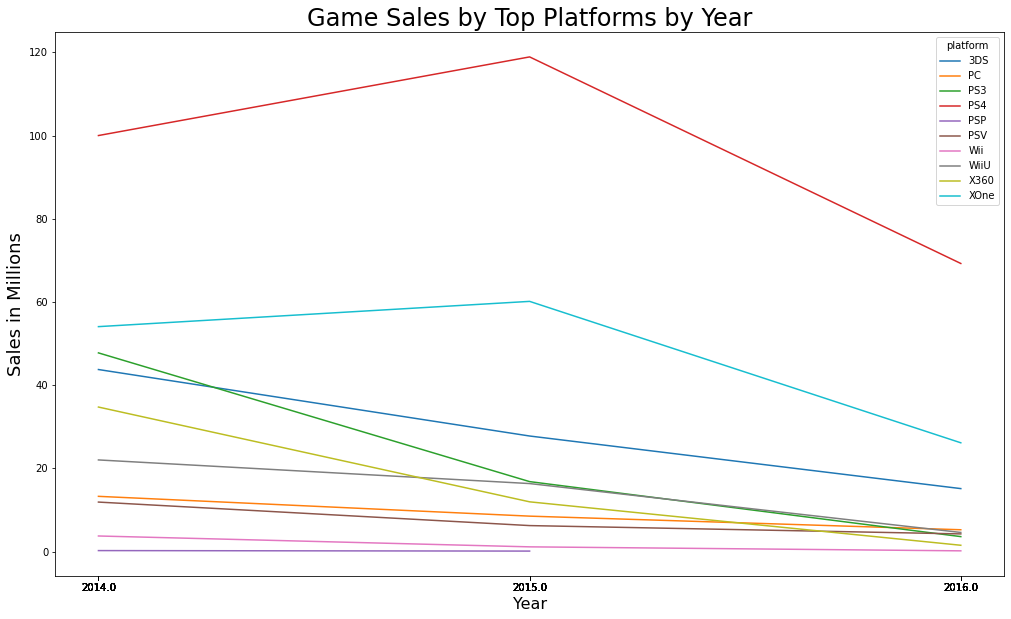

In [30]:
fig,ax=plt.subplots(figsize=(17,10))
ax.set_title('Game Sales by Top Platforms by Year', fontdict={'size':24})
ax.set_ylabel('Sales in Millions', fontdict={'size':18})
ax.set_xlabel('Year', fontdict={'size':16})
ax.set_xticks(df_top_platform_years.year_of_release)
ax.set_xticklabels(df_top_platform_years.year_of_release)

sns.lineplot(data=df_top_platform_years, x="year_of_release", y="total_sales", hue="platform",ci=None)
plt.show()

### Here is the same information Where each platform has its own chart.

Game Sales by Top Platforms by Year


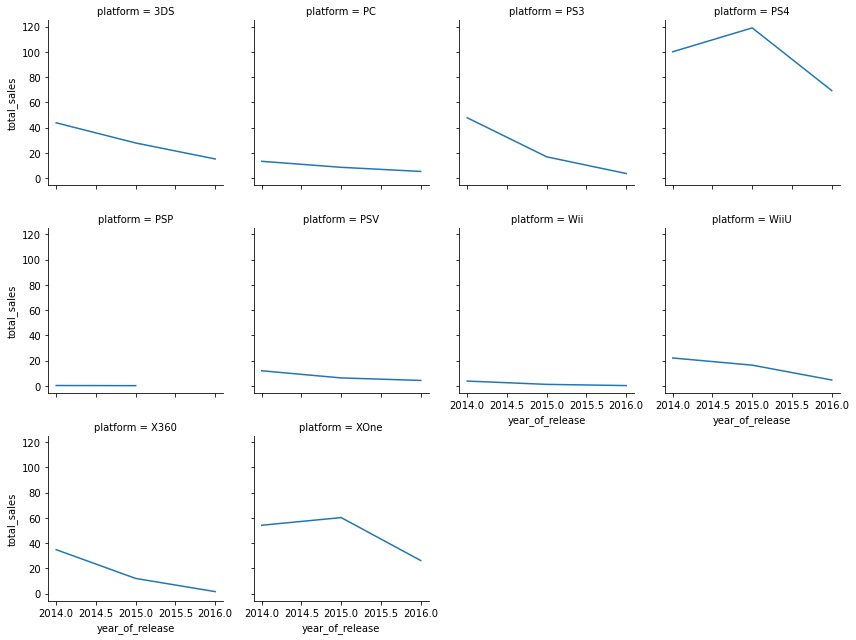

In [31]:
grid = sns.FacetGrid(df_top_platform_years, col="platform",col_wrap=4)
grid.map(sns.lineplot, "year_of_release", "total_sales")
print("Game Sales by Top Platforms by Year")

#### The whole market seems to be in a downward trend.   
#### The platform PC is the longest running and most stable, but it rarely has the most market share.  Let's invest in advertisement for our loyal PC fan base. 
#### The platform PS4 has the highest revenue, but at the same time one of the quickest declines in revenue; let's invest in advertisement for the PS4. 
#### The platform 3DS has stabilized in the last two years when its rivals have been losing revenue and market share; Let's invest in advertisement for 3DS. 
#### The platform XOne has lost revenue at a similar rate to the biggest losers, but it's still retains a large market share. Let's invest in the platform XOne.

### 3f) Build a box plot for the global sales of all games, broken down by platform. 

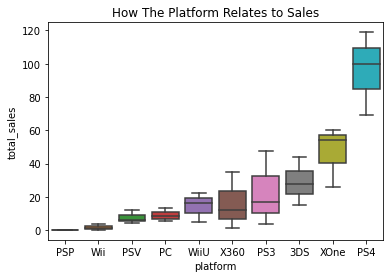

In [32]:
df_relative_to_mean = df_cleaned[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales').reset_index()
grouped=df_cleaned.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
order=df_relative_to_mean['platform']
sns.boxplot(x='platform',y='total_sales',data=grouped,order=order,showfliers=False)
plt.title("How The Platform Relates to Sales")
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you created a boxplot with selected platforms to compare key statistics.\
Btw you can add the following parameter to exclude outliers: showfliers=False

<div class="alert alert-info"> <b>Thanks. Done!</b></div>    


### Are the differences in sales significant? 
#### We can see from the chart that the sales differences are significant.  
### What about average sales on various platforms? Describe your findings.
#### Microsoft and Sony, the market leaders have similar dispersions of total sales.  We can see the entry of PS4 to the market as is has yet to overtake the PS3.  The Wii has the greatest dispersion of all the platforms.  Although the remaining platforms have little dispersion individually, their means are less predictable than the market leaders.  

### 3g) Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. 

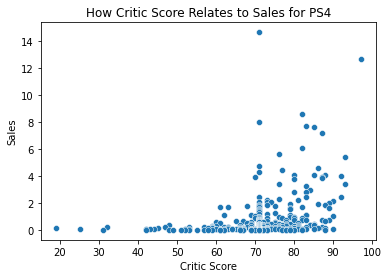

In [33]:
ps4 = df_cleaned.where(df_cleaned['platform']=="PS4")
sns.scatterplot(data=ps4, x="critic_score", y="total_sales")
plt.title("How Critic Score Relates to Sales for PS4")
plt.ylabel('Sales')
plt.xlabel('Critic Score')
plt.show()

### 3h) Keeping your conclusions in mind, compare the sales of the same games on other platforms.

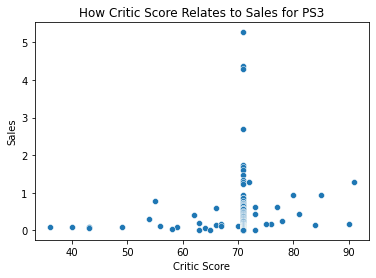

In [34]:
ps3 = df_cleaned.where(df_cleaned['platform']=="PS3")

sns.scatterplot(data=ps3, x="critic_score", y="total_sales")

plt.title('How Critic Score Relates to Sales for PS3')
plt.ylabel('Sales')
plt.xlabel('Critic Score')
plt.show()

### Draw conclusions.
#### The better the critic score, the better the total sales for PS4 games.  for PS3 games, there seems to be a spike at 70.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Well done! Very nice scatter plots.


<div class="alert alert-info"> <b>Thanks!</b> </div>    


### 3i) Take a look at the general distribution of games by genre. 

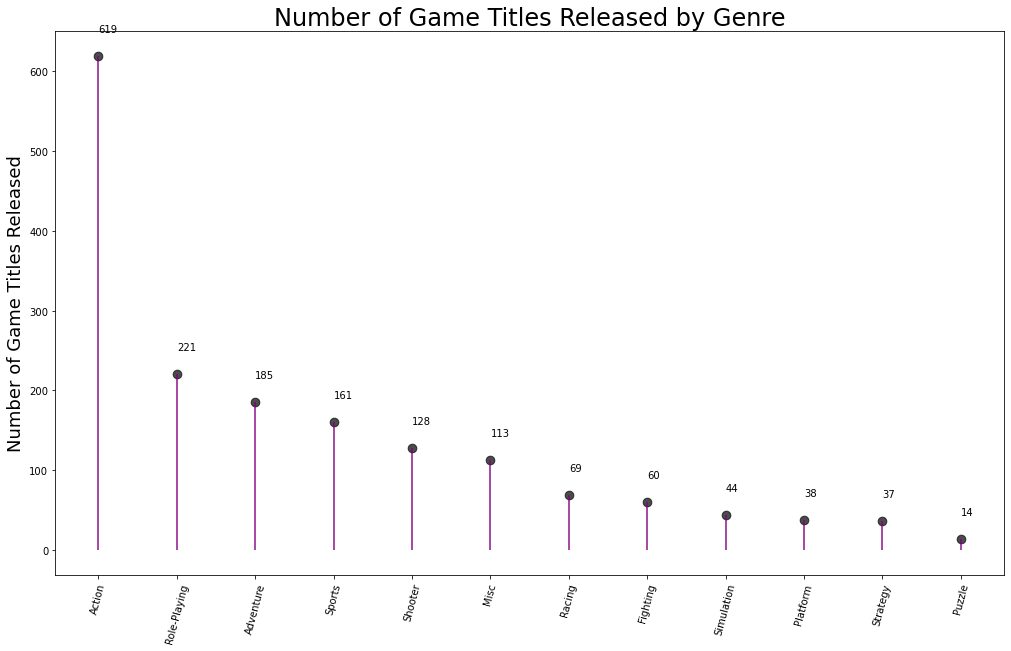

In [35]:
df_games_by_genre =df_cleaned[['genre','name']].groupby(['genre']).count().sort_values(by='name',ascending=False).reset_index()

fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=df_games_by_genre.genre, ymin=0, ymax=df_games_by_genre.name,color='purple',alpha=0.7,linewidth=2)
ax.scatter(x=df_games_by_genre.genre,y=df_games_by_genre.name,s=75,color='black',alpha=0.7)

ax.set_title('Number of Game Titles Released by Genre', fontdict={'size':24})
ax.set_ylabel('Number of Game Titles Released', fontdict={'size':18})
ax.set_xticks(df_games_by_genre.genre)
ax.set_xticklabels(df_games_by_genre.genre,rotation=75)

for row in df_games_by_genre.itertuples():
    ax.text(row.genre,row.name+30, s=round(row.name,2))
plt.show()

### What can we say about the most profitable genres? 
#### Action is by far the most popular genre followed by the Sports genre.  
### Can you generalize about genres with high and low sales?
#### It seems that the more immediately engaging the genre, the higher the sales, while the more cerebral the genre, the lower the sales.  

## Step 4. Create a user profile for each region
### For each region (NA, EU, JP), determine:

In [36]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   float64
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       981 non-null    object 
 10  rating           1689 non-null   object 
 11  year             1689 non-null   object 
 12  total_sales      1689 non-null   float64
dtypes: float64(7), object(6)
memory usage: 184.7+ KB


### 4a) The The top five platforms. Describe variations in their market shares from region to region.

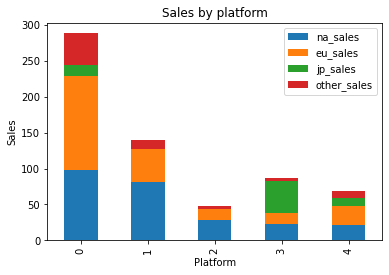

In [37]:
top_5_platforms = df_cleaned[['platform','na_sales','eu_sales','jp_sales','other_sales']].groupby(['platform']).sum().sort_values(by='na_sales',ascending=False).reset_index()
top_5_platforms = top_5_platforms.head(5)
top_5_platforms.plot.bar(stacked=True)
plt.title('Sales by platform')
plt.ylabel('Sales')
plt.xlabel('Platform')
plt.show()

### 4b) The top five genres. Explain the difference.

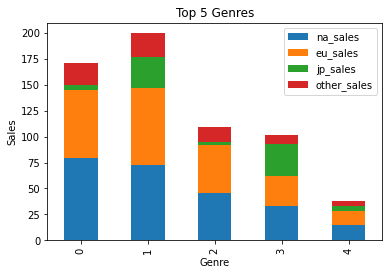

In [38]:
top_5_genres = df_cleaned[['genre','na_sales','eu_sales','jp_sales','other_sales']].groupby(['genre']).sum().sort_values(by='na_sales',ascending=False).reset_index()
top_5_genres = top_5_genres.head(5)
top_5_genres.plot.bar(stacked=True)

plt.title('Top 5 Genres')
plt.ylabel('Sales')
plt.xlabel('Genre')
plt.show()

### 4c) Do ESRB ratings affect sales in individual regions?

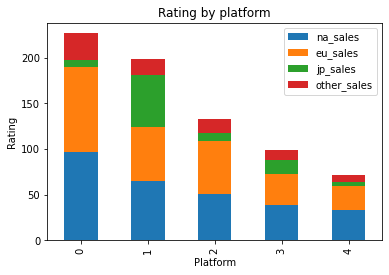

In [39]:
esrb_sales_by_region = df_cleaned[['rating','na_sales','eu_sales','jp_sales','other_sales']].groupby(['rating']).sum().sort_values(by='na_sales',ascending=False).reset_index()
esrb_sales_by_region.plot.bar(stacked=True)

plt.title('Rating by platform')
plt.ylabel('Rating')
plt.xlabel('Platform')
plt.show()

## Step 5. Test the following hypotheses:
### 5a) —Average user ratings of the Xbox One and PC platforms are the same.

In [40]:
df_cleaned['user_ratings_float'] = pd.to_numeric(df_cleaned['user_score'], errors='coerce')
#df_cleaned['user_ratings_float'].fillna(df_cleaned['user_score'].median())
df_xone = df_cleaned.where(df_cleaned.platform == "XOne")
df_pc = df_cleaned.where(df_cleaned.platform == "PC")
df_platform_filtered = df_cleaned.query('platform == "XOne" | platform =="PC"')
df_platform_filtered.platform.unique()

array(['XOne', 'PC'], dtype=object)

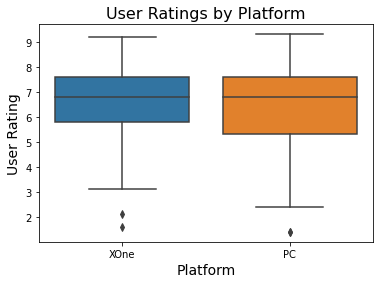

In [41]:
sns.boxplot(x="platform", y="user_ratings_float", data=df_platform_filtered)
plt.ylabel("User Rating", size=14)
plt.xlabel("Platform", size=14)
plt.title("User Ratings by Platform", size=16)
plt.show()

<div class="alert alert-warning">
<b>Reviewer's comment v1:</b>
    
Great! Everything is correct here.
Here we can also use groupped pie charts with subplots (or barcharts if you don't like pie charts). It provides a nice overview of all data. 
    
One small comment regarding market shares by rating. It could be also helpful to understand proportion of unrated games per region, as this is quite an interesting information, especially for JP region.

<div class="alert alert-info"> <b>I plan to do this once I catch-up.  I want to be going over my old projects every morning to make them better. I realize they are my portfolio, and I want to continually improve them until I get a job.</b> </div>    


### These two platforms seem to illustrate similar behavior between the two populations.
#### $H_0$: The average ratings from users of PC and XOne platforms are similar.
#### $H_1$: The average ratings from users of PC and XOne platforms are different.

In [42]:
alpha = 0.05  
results = st.ttest_ind(df_xone['user_ratings_float'], df_pc['user_ratings_float'])

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We can't reject the null hypothesis


### 5b) —Average user ratings for the Action and Sports genres are different.

In [43]:
df_action = df_cleaned.where(df_cleaned.platform == "Action")
df_sports = df_cleaned.where(df_cleaned.platform == "Sports")
df_genre_filtered = df_cleaned.query('genre == "Action" | genre =="Sports"')
df_genre_filtered.genre.unique()

array(['Action', 'Sports'], dtype=object)

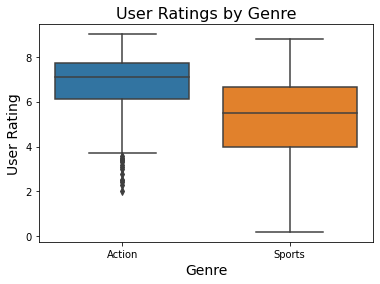

In [44]:
sns.boxplot(x="genre", y="user_ratings_float", data=df_genre_filtered)
plt.ylabel("User Rating", size=14)
plt.xlabel("Genre", size=14)
plt.title("User Ratings by Genre", size=16)
plt.show()

### These two platforms seem to illustrate similar behavior between the two populations.
#### $H_0$: The average ratings from users of Action and Sports genres are similar.
#### $H_1$: The average ratings from users of Action and Sports genres are differerent.

In [45]:
alpha = 0.01 
results = st.ttest_ind(df_sports['user_ratings_float'], df_action['user_ratings_float'])

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

We can't reject the null hypothesis


### Explain:
### —How you formulated the null and alternative hypotheses

#### See charts and t-tests

### Explain:
### —What significance level you chose to test the hypotheses, and why
#### I chose both 0.01 and 0.05 for both, and we were unable to reject the null hypothesis at either threshold.  If there were a difference, I would have investigated further.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You did a great job! Hypotheses have been tested correctly. 
    
Additionally you can apply Levene's test to check variances (equal_var parameter). 


<div class="alert alert-info"> <b>I plan to do this once I catch-up.  I want to be going over my old projects every morning to make them better. I realize they are my portfolio, and I want to continually improve them until I get a job.</b> </div>    


## Step 6. Write a general conclusion

#### The industry has been on a general decline since peaking around 2009.  There are no currently active games released prior to 2007.
#### The average lifecycle of a platform is 7.7 years, but most of the bigger players in the industry have longer lifecycles and crossover many years during platform upgrades.  We should not invest in advertisements where the platform is close to the end of its lifecycle.
#### The dispersion of MS and Sony consoles are similar, whereas the rest of the platforms have dissimilar dispersions.  The strangest platform in terms of dispersion is the Wii; its dispersion is all over the map.
#### Reviews and sales are positively correlated.  
#### The more immediately engaging the genre, the more interest customers have in that genre.  Action and sports are the most popular genres, whereas puzzles, strategy and simulations are the least popluar.  
#### North America and the EU comprise most of the sales.  The others are much less significant.
#### We tested our hypothesis comparing ratings of the Xbox one and PC platforms.  We were unable to reject the null hypothesis, so we determined that the readings are similar.  
#### We also tested our hypothesis comparing user ratings to genre.  We were unable to reject the null hypothesis, so we determined that user ratings for action and sports genres are similar.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Overall you conducted outstanding research with correct interim findings, clean code and nice visualisation.
I like your overall conclusion. It is very structured and provides insights from your analysis.



<div class="alert alert-info"> <b>Some of my conclusions were in line with the previous date ranges. I plan to come back and go through each conclusion one by one. Currently, I am behind the cohort, and I want to catch up to the cohort by the end of this week.</b> </div>